In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics


In [2]:
data_to_load = "Resources/trail_data_clean.csv"
summary_trail_df = pd.read_csv(data_to_load)
summary_trail_df.head()

,name,area_name,city_name,state_name,country_name,length,elevation_gain,difficulty_rating,route_type,avg_rating,...,ice-climbing,snowboarding,hiking,fly-fishing,nature-trips,update_name,update_state,trail_url,Lat,Lng
0,Harding Ice Field Trail,Kenai Fjords National Park,Seward,Alaska,United States,15610.598,1161.8976,5,out and back,5.0,...,0,0,1,0,1,Harding-Ice-Field-Trail,Alaska,https://www.alltrails.com/trail/us/Alaska/Hard...,60.18852,-149.63156
1,Mount Healy Overlook Trail,Denali National Park,Denali National Park,Alaska,United States,6920.162,507.7968,3,out and back,4.5,...,0,0,1,0,1,Mount-Healy-Overlook-Trail,Alaska,https://www.alltrails.com/trail/us/Alaska/Moun...,63.73049,-148.91968
2,Exit Glacier Trail,Kenai Fjords National Park,Seward,Alaska,United States,2896.812,81.9912,1,out and back,4.5,...,0,0,1,0,0,Exit-Glacier-Trail,Alaska,https://www.alltrails.com/trail/us/Alaska/Exit...,60.18879,-149.63100
3,Horseshoe Lake Trail,Denali National Park,Denali National Park,Alaska,United States,3379.614,119.7864,1,loop,4.5,...,0,0,1,0,1,Horseshoe-Lake-Trail,Alaska,https://www.alltrails.com/trail/us/Alaska/Hors...,63.73661,-148.91500
4,Triple Lakes Trail,Denali National Park,Denali National Park,Alaska,United States,29772.790,1124.7120,5,out and back,4.5,...,0,0,1,0,1,Triple-Lakes-Trail,Alaska,https://www.alltrails.com/trail/us/Alaska/Trip...,63.73319,-148.89682


In [3]:
trail_per_state = summary_trail_df.groupby(['state_name']).count()["name"]

In [4]:
trail_per_state

state_name
Alaska             29
Arizona           174
Arkansas           16
California        707
Colorado          262
Florida            31
Georgia             1
Hawaii             35
Indiana            16
Kentucky           28
Maine             179
Maui               14
Michigan            4
Minnesota           7
Missouri            2
Montana           151
Nevada             25
New Mexico          8
North Carolina    118
North Dakota       23
Ohio               50
Oregon             22
South Carolina      8
South Dakota       20
Tennessee         175
Texas              94
Utah              292
Virginia          191
Washington        320
Wyoming           311
Name: name, dtype: int64

In [5]:
trail_per_state2 = summary_trail_df.groupby(['state_name']).mean()['elevation_gain']
trail_per_state2 

state_name
Alaska             385.876800
Arizona            726.802607
Arkansas           212.769450
California         862.935361
Colorado           503.612198
Florida              2.458065
Georgia             36.880800
Hawaii             390.527177
Indiana             37.090350
Kentucky           171.199629
Maine              249.457515
Maui               595.448571
Michigan           560.832000
Minnesota          117.173829
Missouri            65.227200
Montana            771.293372
Nevada             467.026752
New Mexico         216.827100
North Carolina    1023.151607
North Dakota       406.046609
Ohio               122.011440
Oregon             478.923927
South Carolina       5.943600
South Dakota       134.005320
Tennessee          730.272933
Texas              458.626723
Utah               415.941353
Virginia           628.507175
Washington         994.677652
Wyoming            507.507681
Name: elevation_gain, dtype: float64

In [6]:
# Sum of meters for all trails by state
trail_per_state3 = summary_trail_df.groupby(['state_name']).sum()['length']
pd.options.display.float_format = '{:.2f}'.format
trail_per_state3 

state_name
Alaska             279542.36
Arizona           3028616.95
Arkansas            90283.97
California       15681408.96
Colorado          3178446.50
Florida            444499.71
Georgia              2574.94
Hawaii             439510.75
Indiana             99135.34
Kentucky           275679.94
Maine             1071337.64
Maui               153209.17
Michigan           126976.93
Minnesota           49406.74
Missouri            37014.82
Montana           3477140.00
Nevada             252022.64
New Mexico          62764.26
North Carolina    2879753.00
North Dakota       509517.04
Ohio               354537.60
Oregon             381896.38
South Carolina     140012.58
South Dakota       175739.93
Tennessee         3001097.23
Texas             1569267.43
Utah              4671270.28
Virginia          2978244.60
Washington        6625652.78
Wyoming           6526839.30
Name: length, dtype: float64

In [7]:
trail_per_state4 = summary_trail_df.groupby(['state_name']).mean()['avg_rating']
trail_per_state4 

state_name
Alaska           4.05
Arizona          4.26
Arkansas         3.97
California       4.04
Colorado         4.37
Florida          3.61
Georgia          4.00
Hawaii           4.20
Indiana          3.97
Kentucky         3.80
Maine            4.36
Maui             4.57
Michigan         2.25
Minnesota        3.93
Missouri         4.00
Montana          4.26
Nevada           4.40
New Mexico       4.00
North Carolina   4.07
North Dakota     4.20
Ohio             4.21
Oregon           4.14
South Carolina   3.94
South Dakota     4.17
Tennessee        4.21
Texas            3.99
Utah             4.23
Virginia         4.07
Washington       4.38
Wyoming          4.10
Name: avg_rating, dtype: float64

In [8]:
trail_per_state_reviews = summary_trail_df.groupby(['state_name']).sum()['num_reviews']
trail_per_state_reviews

state_name
Alaska             1522
Arizona            9354
Arkansas            708
California        38987
Colorado          30411
Florida             646
Georgia              26
Hawaii             1464
Indiana             498
Kentucky            858
Maine             12286
Maui               1834
Michigan             26
Minnesota            63
Missouri             42
Montana           11347
Nevada              676
New Mexico          197
North Carolina     3975
North Dakota        685
Ohio               4662
Oregon             2148
South Carolina      341
South Dakota       1713
Tennessee         17882
Texas              4231
Utah              35769
Virginia          13459
Washington        21628
Wyoming           15605
Name: num_reviews, dtype: int64

In [9]:
#Average length by state
trail_per_state5 = summary_trail_df.groupby(['state_name']).mean()['length']

In [10]:
state_df = pd.DataFrame({
    "Total Trails": trail_per_state,
    "Total Meters of Trails":trail_per_state3,
    "Avg Trail Length":trail_per_state5,
    "Avg Elevation Gain":trail_per_state2,
    "Total Number of Reviews":trail_per_state_reviews,
    "Avg Rating":trail_per_state4
})
state_df

,Total Trails,Total Meters of Trails,Avg Trail Length,Avg Elevation Gain,Total Number of Reviews,Avg Rating
state_name,,,,,,
Alaska,29,279542.36,9639.39,385.88,1522,4.05
Arizona,174,3028616.95,17405.84,726.80,9354,4.26
Arkansas,16,90283.97,5642.75,212.77,708,3.97
California,707,15681408.96,22180.21,862.94,38987,4.04
Colorado,262,3178446.50,12131.48,503.61,30411,4.37
Florida,31,444499.71,14338.70,2.46,646,3.61
Georgia,1,2574.94,2574.94,36.88,26,4.00
Hawaii,35,439510.75,12557.45,390.53,1464,4.20
Indiana,16,99135.34,6195.96,37.09,498,3.97


In [30]:
state_df2 = state_df.sort_values("Total Trails")

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

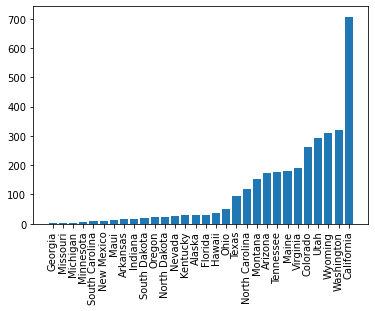

In [31]:
import numpy as np
y_axis = state_df2["Total Trails"]
x_axis = state_df2.index
plt.bar(x_axis,y_axis)
plt.gca().invert_yaxis
plt.xticks(rotation = 90)

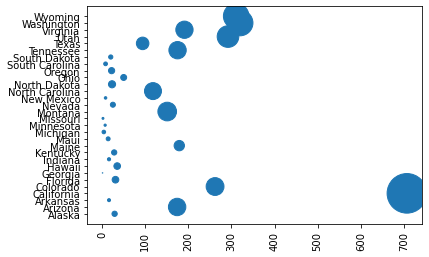

In [38]:
x_axis = state_df["Total Trails"]
y_axis = state_df.index
plt.scatter(x_axis,y_axis,s = (state_df["Total Meters of Trails"])/10000)
plt.gca().invert_yaxis
plt.xticks(rotation = 90)
plt.xlabel = "Total Trails"
alpha= .2

In [ ]:
#Avg_ratings
summary_trail_df["avg_rating"].describe()

#Results: average rating of 4.2 out of 5 stars and quartiles 4.0-5.0 will make it difficult
# to differentiate trails based on avg_rating alone.

In [ ]:
# Number of reviews
summary_trail_df["num_reviews"].describe()

#Results: graph to see skewing.  Q:  What's causing some trails to have more reviews (traffic)?  Features, activities, etc?